In [2]:
import pandas as pd
import numpy as np

In [3]:
#Дата сет был трансформирован в экселе - проведен feature eng 
#расчитаны три новые фичи : угол наклона кривой, станд отклонение, медиана 
#так же отфильтрованы клиенты по возрастанию и удалены клиенты у которых данные были меньше чем за 6 мес примерно 400 клиентов

Train = pd.read_excel("D:\Python\Task_BigDataSchool\BigDataSchool2\Base1.xlsx", decimal = ",")

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [5]:
Train

ID    V1slope   V2slope   V3slope   V4slope   V5slope       V6slope  \
0        1   3.092063  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
1        2 -10.699621  0.000000  0.000000  0.000000  0.000000  1.866103e-01   
2        4  -4.091389  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
3        5  -0.115289  0.000000  0.000000  0.000000  0.000000  2.240154e-01   
4        6  -7.823143  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
5        7   0.792442  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
6        8 -22.021342  0.000000  0.818358  0.980262  0.000000  3.797540e-01   
7        9  -6.687792  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
8       10  10.061953  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
9       11  -1.768039  0.000000  0.000000  0.000000  0.000000  1.107806e-01   
10      12  -5.342506  0.000000  0.000000  0.000000  0.000000 -3.230760e-01   
11      13  -5.908241  0.000000  0.000000 -0.140964  0.000000  0.000000e+00   
12      14  -0.018750  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
13      15  14.581462  0.000000  0.000000  0.000000  0.000000  1.647557e-01   
14      16  -8.191542  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
15      17  -1.827521  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
16      18   1.245272  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
17      19  -1.024943  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
18      20   0.567445  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
19      21  -0.428987  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
20      23   9.541052  0.000000  0.145503  0.000000  0.000000  1.529214e-01   
21      24   0.858272  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
22      25  -9.067637  0.000000  0.000000  0.000000  0.000000 -2.094806e-01   
23      26   0.552829  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
24      27 -12.552606  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
25      28   0.032880  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
26      29   1.846288  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
27      30   9.076176  0.000000  0.000000  0.000000  0.243581  0.000000e+00   
28      31   1.699954  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
29      32  -3.684485  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
30      33  -5.680876  0.000000  0.000000  0.000000 -0.424024  0.000000e+00   
31      34   0.354225  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
32      35   5.300925  0.000000  0.000000  0.000000  0.000000 -1.115299e-01   
33      36  -0.839683  0.000000  0.000000  0.000000  0.000000  1.853060e-01   
34      37   0.573846  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
35      38   2.952882  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
36      39   1.643593  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
37      40   6.821519  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
38      41   0.281529  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
39      42  -3.747817  0.000000  0.000000 -0.085315  0.000000  0.000000e+00   
40      43  -0.556768  0.146030  0.000000  0.000000  0.000000  0.000000e+00   
41      44 -21.086499  0.000000  0.000000  0.093853  3.181372 -1.051602e-01   
42      45  -1.442709  0.000000  0.000000  0.000000  0.000000 -2.966171e-02   
43      46  -0.274565  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
44      47  -2.599236  0.000000  0.000000  0.000000  0.000000  4.878915e-01   
45      48  -0.326300  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
46      49   0.557596  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
47      50  -0.061174  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
48      51  -0.794340  0.000000  0.000000  0.000000  0.000000  8.010086e-02   
49      52   0.098874  0.000000  0.000000  0.000000  0.000

In [6]:
print(Train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Columns: 127 entries, ID to V42med
dtypes: float64(123), int64(4)
memory usage: 8.6 MB
None


In [7]:
Train.describe()

ID      V1slope      V2slope      V3slope      V4slope  \
count  8831.000000  8831.000000  8831.000000  8831.000000  8831.000000   
mean   4576.497565    -0.681975     0.000917     0.000100     0.000569   
std    2648.330669    11.401537     0.097813     0.050509     0.181070   
min       1.000000  -324.612496    -3.057236    -2.709319    -9.757298   
25%    2285.500000    -3.213360     0.000000     0.000000     0.000000   
50%    4571.000000    -0.132176     0.000000     0.000000     0.000000   
75%    6855.500000     1.772026     0.000000     0.000000     0.000000   
max    9258.000000   305.997992     4.687436     1.046914     4.756396   

           V5slope      V6slope      V7slope      V8slope      V9slope  \
count  8831.000000  8830.000000  8831.000000  8831.000000  8831.000000   
mean      0.009964     0.003365     0.008246    -0.105707    -0.015335   
std       1.042166     0.362032     0.732862     4.503056     1.340189   
min     -12.606462   -15.071181   -14.536791  -300.046502   -94.834920   
25%       0.000000     0.000000    -0.021078     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.017644     0.000000     0.000000   
max      90.614773    10.558922    23.075888    74.138133    25.612828   

          V10slope     V11slope     V12slope     V13slope     V14slope  \
count  8831.000000  8831.000000  8831.000000  8831.000000  8831.000000   
mean     -0.030800     0.009019     0.024204    -0.000484    -0.019896   
std       3.089588     0.682828     1.322608     1.604135     1.400653   
min    -119.451485   -19.179836   -22.219863   -80.807220   -74.663114   
25%       0.000000     0.000000    -0.053879     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.052902     0.000000     0.000000   
max      50.786077    46.323840    84.770643    89.862557    47.424986   

          V15slope     V16slope     V17slope  V18slope     V19slope  \
count  8831.000000  8831.000000  8830.000000    8831.0  8830.000000   
mean      0.025571     0.049534     0.057423       0.0     0.002270   
std       3.850252     2.459487     1.879281       0.0     0.221932   
min     -79.966446  -106.238607   -28.721475       0.0    -8.686481   
25%       0.000000    -0.141030    -0.140800       0.0     0.000000   
50%       0.000000     0.000000     0.000000       0.0     0.000000   
75%       0.000000     0.197178     0.195697       0.0     0.000000   
max     117.625115    84.653226    28.371698       0.0     5.001704   

          V20slope     V21slope     V22slope     V23slope     V24slope  \
count  8831.000000  8831.000000  8831.000000  8831.000000  8831.000000   
mean     -0.000598    -0.001245    -0.743483    -0.084170    -0.080969   
std       0.019392     0.046965    15.616144     1.464089     1.498255   
min      -0.300000    -0.300000  -554.599780   -10.600000    -8.800000   
25%       0.000000     0.000000    -3.978654    -0.428571    -0.093023   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     2.603547     0.400000     0.085714   
max       0.300000     0.300000   293.578095     8.600000     8.800000   

          V25slope     V26slope     V27slope     V28slope     V29slope  \
count  8831.000000  8831.000000  8831.000000  8831.000000  8831.000000   
mean     -0.175546     0.001844    -0.076692    -0.037319     0.002460   
std       1.219568     0.612450     1.498603     0.769592     0.323666   
min      -9.300000    -7.800000    -8.900000    -7.200000   -13.196956   
25%       0.000000    -0.100000    -0.428571    -0.230249     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.093809     0.400000     0.175676     0.000000   
max       8.400000     6.428571    10.200000     5.542857     6.307458   

          V30slope     V31slope     V32sl

In [8]:
Train.isnull().sum()

ID          0
V1slope     0
V2slope     0
V3slope     0
V4slope     0
V5slope     0
V6slope     1
V7slope     0
V8slope     0
V9slope     0
V10slope    0
V11slope    0
V12slope    0
V13slope    0
V14slope    0
V15slope    0
V16slope    0
V17slope    1
V18slope    0
V19slope    1
V20slope    0
V21slope    0
V22slope    0
V23slope    0
V24slope    0
V25slope    0
V26slope    0
V27slope    0
V28slope    0
V29slope    0
V30slope    0
V31slope    0
V32slope    1
V33slope    1
V34slope    0
V35slope    0
V36slope    0
V37slope    0
V38slope    0
V39slope    0
V40slope    1
V41slope    0
V42slope    0
V1dev       0
V2dev       0
V3dev       0
V4dev       0
V5dev       0
V6dev       1
V7dev       0
V8dev       0
V9dev       0
V10dev      0
V11dev      0
V12dev      0
V13dev      0
V14dev      0
V15dev      0
V16dev      0
V17dev      1
V18dev      0
V19dev      1
V20dev      0
V21dev      0
V22dev      0
V23dev      0
V24dev      0
V25dev      0
V26dev      0
V27dev      0
V28dev      0
V29dev

In [9]:
#импутация пропусков сразу сделаем до разделения на тренировочную и обучающую выборку так как всего по 1 значению отсутствует
for i in ['V6slope', 'V17slope', 'V19slope', 'V32slope', 'V33slope', 'V40slope', 'V6dev', 'V17dev', 'V19dev', 'V32dev', 'V33dev',
         'V40dev']:
    if i in Train.columns:
         Train[i].fillna(Train[i].median(), inplace=True)

In [10]:
from feature_selector import FeatureSelector

In [11]:
fs = FeatureSelector(data = Train)

No labels provided. Feature importance based methods are not available.


In [12]:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [13]:
#еще раз проверка на пропуски с помощью фиче селектора
fs.missing_stats.head()

missing_fraction
ID                   0.0
V38dev               0.0
V9med                0.0
V8med                0.0
V7med                0.0

In [14]:
#корреляция фич с помощью фиче селектора
fs.identify_collinear(correlation_threshold=0.7)

25 features with a correlation magnitude greater than 0.70.



In [15]:
correlated_features = fs.ops['collinear']
correlated_features[:25]

['V12slope',
 'V19slope',
 'V27slope',
 'V39slope',
 'V5dev',
 'V12dev',
 'V14dev',
 'V19dev',
 'V27dev',
 'V39dev',
 'V5med',
 'V12med',
 'V13med',
 'V14med',
 'V15med',
 'V16med',
 'V19med',
 'V27med',
 'V29med',
 'V34med',
 'V36med',
 'V38med',
 'V39med',
 'V40med',
 'V41med']

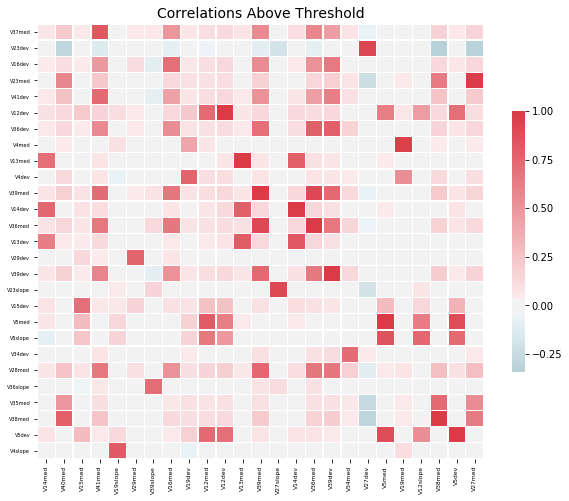

In [16]:
fs.plot_collinear()

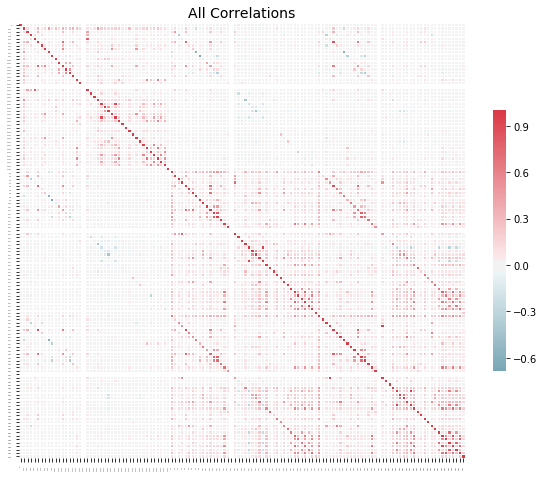

In [17]:
fs.plot_collinear(plot_all=True)

In [18]:
collinear_features = fs.ops['collinear']
fs.record_collinear

drop_feature corr_feature  corr_value
0      V12slope      V5slope    0.751908
1      V19slope      V4slope    0.811924
2      V27slope     V23slope    0.916691
3      V39slope     V36slope    0.714628
4         V5dev      V5slope    0.733459
5        V12dev        V5dev    0.704767
6        V14dev       V13dev    0.836674
7        V19dev        V4dev    0.763356
8        V27dev       V23dev    0.936706
9        V39dev       V36dev    0.785056
10        V5med      V5slope    0.862887
11        V5med        V5dev    0.890634
12       V12med        V5dev    0.738343
13       V12med       V12dev    0.731172
14       V12med        V5med    0.801052
15       V13med       V13dev    0.808516
16       V13med       V14dev    0.793650
17       V14med       V14dev    0.752860
18       V14med       V13med    0.709865
19       V15med       V15dev    0.701356
20       V16med       V16dev    0.702680
21       V19med        V4med    0.971091
22       V27med       V23med    0.982942
23       V29med       V29dev    0.761078
24       V34med       V34dev    0.727047
25       V36med       V36dev    0.782375
26       V38med       V35med    0.743936
27       V39med       V36dev    0.711231
28       V39med       V39dev    0.737995
29       V39med       V28med    0.752773
30       V39med       V36med    0.911618
31       V40med       V38med    0.790299
32       V41med       V41dev    0.741576
33       V41med       V37med    0.832426
34       V41med       V39med    0.722882

In [19]:
#дропаем фичи с кореляцией больше 0.7 
columns = ['V12slope',
 'V19slope',
 'V27slope',
 'V39slope',
 'V5dev',
 'V12dev',
 'V14dev',
 'V19dev',
 'V27dev',
 'V39dev',
 'V5med',
 'V12med',
 'V13med',
 'V14med',
 'V15med',
 'V16med',
 'V19med',
 'V27med',
 'V29med',
 'V34med',
 'V36med',
 'V38med',
 'V39med',
 'V40med',
 'V41med']
Train.drop(columns, axis=1, inplace=True)

In [20]:
#подгрузим категориальные фичи
categ = pd.read_csv("D:\Python\Task_BigDataSchool\BigDataSchool2\Base2.txt", sep="\t")

In [21]:
print(categ.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9267 entries, 0 to 9266
Data columns (total 5 columns):
ID    9267 non-null int64
T1    9267 non-null object
T2    9267 non-null object
T3    9267 non-null object
T4    9267 non-null object
dtypes: int64(1), object(4)
memory usage: 362.1+ KB
None


In [22]:
categorical_columns = [c for c in categ.columns if categ[c].dtype.name == 'object']
categ[categorical_columns].describe()

T1  \
count                                                9267   
unique                                                 25   
top     3aac67cd73162d439f9947d61357a1b62432f0ca84b7f4...   
freq                                                 1093   

                                                       T2  \
count                                                9267   
unique                                                  7   
top     a4b709af5eb19e6494158f9e3a67696411d8a7cd7e0b5d...   
freq                                                 3835   

                                                       T3  \
count                                                9267   
unique                                                152   
top     68c03829c28a08159e587ba32f165c445276f7ca972481...   
freq                                                 3147   

                                                       T4  
count                                                9267  
unique                                               1394  
top     1201b48f642f405715d25e70cd1016472c601373615343...  
freq                                                  377

In [23]:
pd.set_option('display.max_rows', 5000)

In [24]:
#Обработка редких категорий
cat_columns = [c for c in categ.columns if categ[c].dtype.name == 'object']
for c in cat_columns:
    print(categ[c].value_counts())

3aac67cd73162d439f9947d61357a1b62432f0ca84b7f435f4177a8c    1093
271f93f45e9b4067327ed5c8cd30a034730aaace4382803c3e1d6c2f     927
86730f0dd6381286d3b5f0dfb897ce4895480ce97564c6be4f1543b8     591
87592c38e2b36a1d35437714ecedee4d6fad7a1a0b1bf5d7a2ab68ef     566
58b2aaa0bfae7acc021b3260e941117b529b2e69de878fd7d45c61a9     545
751267062c92e398c3942214b58136f73a4b9e1ca9a214d72d6d5805     475
a29662a4f922a60411ca84c145bf83b76ec59210be23d995e30934d2     474
525ab75c928c6fac98a0f62e4da5316b7247ccd704c967ef9142925c     416
31da1a042dc910775ed8b487afbdafd929a7afdeaadc660cb963bd26     405
bd1a1bdf6eae5ee14c3fee371cca975a5e052009bc67ce8f11cb7271     386
a210f3351c013fe54d4d7d3ee0d33b76036c62324909b3ef458401c3     385
192f56eb9bd894a72b30c303247b107be2c4591f310dd69a67927f48     325
1c18a39e0bd33685c5684a50010cf67a80f2524417f0a2cfde03810d     318
6d81d201ee3527b82cf59f3bface88fd2ddbffd3d58fcda4d4b5c4ec     299
b51d18b551043c1f145f22dbde6f8531faeaf68c54ed9dd79ce24d17     260
e356f7a3e975871b64a30ec23

In [25]:
categ.loc[categ['T3'].value_counts()[categ['T3']].values < 55,
'T3'] = 'OTHER'

In [26]:
#удаляем фичу с 1000+ категорий редких категорий слишком много

columns = ['T4']
categ.drop(columns, axis=1, inplace=True)

In [27]:
#соединим 2 дата сета
train = Train.merge(categ)

In [28]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 8830
Columns: 105 entries, ID to T3
dtypes: float64(98), int64(4), object(3)
memory usage: 7.1+ MB
None


In [29]:
#подгрузим целевую переменную
train_label = pd.read_csv(r"D:\Python\Task_BigDataSchool\BigDataSchool2\train.txt", sep="\t")

In [30]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 2 columns):
ID        6229 non-null int64
TARGET    6229 non-null int64
dtypes: int64(2)
memory usage: 97.4 KB


In [31]:
#распределение классов
print(train_label['TARGET'].value_counts(dropna=False).tail(10))

2    2377
1    2366
3     952
0     534
Name: TARGET, dtype: int64


In [32]:
#соединим целевую метку и предидущие 2 дата сета
df = train.merge(train_label)

In [33]:
df.describe()

ID      V1slope      V2slope      V3slope      V4slope  \
count  5941.000000  5941.000000  5941.000000  5941.000000  5941.000000   
mean   4612.100488    -0.887482     0.000340    -0.000502    -0.002568   
std    2642.295643    11.333377     0.101789     0.056290     0.180804   
min       1.000000  -324.612496    -3.057236    -2.709319    -9.757298   
25%    2312.000000    -3.378495     0.000000     0.000000     0.000000   
50%    4655.000000    -0.173567     0.000000     0.000000     0.000000   
75%    6881.000000     1.573328     0.000000     0.000000     0.000000   
max    9258.000000   281.131518     4.687436     1.046914     2.702719   

           V5slope      V6slope      V7slope      V8slope      V9slope  \
count  5941.000000  5941.000000  5941.000000  5941.000000  5941.000000   
mean      0.011060    -0.000068     0.005180    -0.141901    -0.014014   
std       1.245576     0.398082     0.741268     5.109650     1.481338   
min     -12.606462   -15.071181   -14.536791  -300.046502   -94.834920   
25%       0.000000     0.000000    -0.021292     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.017397     0.000000     0.000000   
max      90.614773    10.558922    14.356005    62.234529    25.612828   

          V10slope     V11slope     V13slope     V14slope     V15slope  \
count  5941.000000  5941.000000  5941.000000  5941.000000  5941.000000   
mean     -0.059357     0.004258    -0.016965    -0.031431     0.001859   
std       3.367048     0.358097     1.453542     1.305042     3.976837   
min    -119.451485   -19.179836   -80.807220   -74.663114   -59.012561   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max      50.786077    14.303863    35.845183    23.676154   117.625115   

          V16slope     V17slope  V18slope     V20slope     V21slope  \
count  5941.000000  5941.000000    5941.0  5941.000000  5941.000000   
mean      0.042181     0.046528       0.0    -0.000462    -0.001210   
std       2.086138     1.886576       0.0     0.019089     0.046444   
min     -40.183673   -28.721475       0.0    -0.257143    -0.300000   
25%      -0.139596    -0.145650       0.0     0.000000     0.000000   
50%       0.000000     0.000000       0.0     0.000000     0.000000   
75%       0.194015     0.181362       0.0     0.000000     0.000000   
max      28.471300    28.371698       0.0     0.257143     0.300000   

          V22slope     V23slope     V24slope     V25slope     V26slope  \
count  5941.000000  5941.000000  5941.000000  5941.000000  5941.000000   
mean     -0.928859    -0.100479    -0.089723    -0.179915    -0.000818   
std      14.245640     1.455415     1.492290     1.242847     0.634758   
min    -453.270486   -10.600000    -8.800000    -8.700000    -7.800000   
25%      -4.180430    -0.428571    -0.114286     0.000000    -0.100000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       2.463411     0.378378     0.085714     0.000000     0.100000   
max     288.592190     7.500000     8.800000     8.400000     6.428571   

          V28slope     V29slope     V30slope     V31slope     V32slope  \
count  5941.000000  5941.000000  5941.000000  5941.000000  5941.000000   
mean     -0.036917     0.002704    -0.098823    -0.119696     0.031717   
std       0.761800     0.297175     2.747875     3.831954     1.109920   
min      -5.514286    -6.674634   -45.465452   -42.149600   -28.721257   
25%      -0.255814     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.171429     0.000000     0.000000     0.000000     0.000000   
max       4.914286     6.307458    29.651943   100.081650    18.376150   

          V33slope      V34slope     V35s

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5941 entries, 0 to 5940
Columns: 106 entries, ID to TARGET
dtypes: float64(98), int64(5), object(3)
memory usage: 4.8+ MB
None


In [35]:
#Дропаем фичи с нулевыми значениями
columns = ['V18slope', 'V18dev', 'V18med']
df.drop(columns, axis=1, inplace=True)

In [ ]:
#Catboost multiclasification

In [36]:
import matplotlib.pyplot as plot
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import catboost
from catboost import CatBoostClassifier, Pool

In [37]:
y = df.TARGET
X = df.drop(['TARGET', 'ID'], axis=1, inplace=True)

In [39]:
#Укажем категориальные фичи для Catboost
categorical_features_indices = np.where(df.dtypes != np.float)[0]
categorical_features_indices

array([ 98,  99, 100], dtype=int64)

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(df.values, y, test_size=0.3,
random_state=1234)

In [41]:
# Запустим обучение с настройками по умолчанию
model = CatBoostClassifier(
    eval_metric='Accuracy',
    depth = 8,
    random_seed=42,
    loss_function='MultiClass',
    logging_level='Silent'
)

In [42]:
  model.fit(
      X_train, y_train, 
      cat_features=categorical_features_indices,
      eval_set=(X_valid, y_valid), 
      use_best_model=True,
      plot=True
)

MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed…

In [43]:
print("Правильность на контрольной выборке: {:.2f}".format(model.score(X_valid, y_valid)))

Правильность на контрольной выборке: 0.47


In [49]:
model = CatBoostClassifier(
    eval_metric='Accuracy',
    depth = 10,
    random_seed=17,
    loss_function='MultiClass',
    logging_level='Silent', 
    l2_leaf_reg = 30, 
    learning_rate = 0.01, 
    iterations = 1000, 
    random_strength= 0.1, 
    bagging_temperature = 0.1
)

In [50]:
  model.fit(
      X_train, y_train, 
      cat_features=categorical_features_indices,
      eval_set=(X_valid, y_valid), 
      use_best_model=True,
      plot=True
)

MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed…

In [51]:
print("Правильность на контрольной выборке: {:.2f}".format(model.score(X_valid, y_valid)))

Правильность на контрольной выборке: 0.47


In [ ]:
#Настройка гиперпараметров

#strat = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#from sklearn.model_selection import GridSearchCV
#cat = CatBoostClassifier(iterations = 10, loss_function = 'MultiClass', 
                         random_seed = 42, logging_level = 'Silent', custom_loss = 'Accuracy',
                         eval_metric='Accuracy')
#param_grid = {'l2_leaf_reg':[2, 3, 4, 5], 
              'learning_rate':[0.04, 0.06, 0.08, 0.1, 0.12, 0.14],
              'depth': [6, 7, 8,]
              #'random_strength' : [0.1, 0.3, 0.5, 0.7, 0.9],
              #'bagging_temperature': [0.1, 0.3, 0.5, 0.7, 0.9]
             }
#grid_search = GridSearchCV(cat, param_grid, n_jobs = -1, return_train_score = True, cv = strat)
#grid_search.fit(X_train, y_train, cat_features = categorical_features_indices)
#test_score = accuracy_score(y_valid, grid_search.predict(X_valid))
#print('Правильность на валидационном наборе: {:.3f}'.format(test_score))
#print('Наилучшие значения параметров: {}'.format(grid_search.best_params_))
#print('Наилучшее значение правильности: {:.3f}'.format(grid_search.best_score_))

In [90]:
#Важность признаков метод get_feature_importance
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)    
    
    
model = CatBoostClassifier(
    custom_loss = 'Accuracy',
    eval_metric='Accuracy',
    depth = 8,
    random_seed=17,
    loss_function='MultiClass',
    logging_level='Silent',
    l2_leaf_reg = 30, learning_rate = 0.01, iterations = 1000, random_strength= 0.1, bagging_temperature = 0.1
).fit(train_pool)
feature_importances = model.get_feature_importance(train_pool)
feature_names = df.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse = True):
    print('{}: {}'.format(name, score))

V42med: 18.79020400760927
T1: 6.5726873190392
V1med: 5.774577455481334
V37med: 4.980571939832189
V28med: 4.7924145106375455
V36dev: 4.068248010674569
V41dev: 3.901100478901286
V25dev: 3.563376285640886
T3: 3.4501024708209793
V35dev: 3.388832135586687
V23dev: 2.9967813817348246
V42dev: 2.5721593129813667
T2: 2.193846022180083
V33dev: 1.6382011460220371
V22dev: 1.5096081791946108
V1slope: 1.4160414463180069
V26slope: 1.3691730266526707
V16dev: 1.2643016481256155
V35med: 1.12778558751361
V17slope: 1.0566757619078226
V16slope: 0.9547520888454375
V10slope: 0.8937319037353709
V17dev: 0.8880233645202662
V34slope: 0.8627294372734854
V40dev: 0.8414418737009486
V25med: 0.8386504559485468
V33slope: 0.7541726581130701
V34dev: 0.7387144421049181
V8med: 0.6915498540524079
V42slope: 0.6886594587919749
V6dev: 0.6723438797990292
V7slope: 0.6374170575424362
V37dev: 0.6255044779693024
V26dev: 0.6107699725043207
V25slope: 0.6072926412996047
V7dev: 0.5859344295155825
V38slope: 0.5522692065188567
V17med: 0.

In [120]:
#LogReg classification
df1 = train.merge(train_label)
columns = ['V18slope', 'V18dev', 'V18med']
df1.drop(columns, axis=1, inplace=True)

In [121]:
#   dummies one hot encode
cat_df1_onehot = df1.copy()
cat_df1_onehot = pd.get_dummies(cat_df1_onehot, columns=['T1', 'T2', 'T3'], prefix = ['T1', 'T2', 'T3'])
print(cat_df1_onehot.head())

   ID    V1slope  V2slope  V3slope  V4slope  V5slope   V6slope   V7slope  \
0   1   3.092063      0.0      0.0      0.0      0.0  0.000000  0.000000   
1   2 -10.699621      0.0      0.0      0.0      0.0  0.186610  0.595002   
2   4  -4.091389      0.0      0.0      0.0      0.0  0.000000  0.000000   
3   5  -0.115289      0.0      0.0      0.0      0.0  0.224015  0.263977   
4   6  -7.823143      0.0      0.0      0.0      0.0  0.000000  0.000000   

    V8slope  V9slope  V10slope  V11slope  V13slope  V14slope  V15slope  \
0 -3.141274      0.0  0.000000       0.0       0.0       0.0  3.058939   
1 -0.056154      0.0  0.000000       0.0       0.0       0.0  0.000000   
2  0.369919      0.0  0.000000       0.0       0.0       0.0  0.000000   
3 -0.069820      0.0 -2.805608       0.0       0.0       0.0  0.000000   
4  0.000000      0.0  0.000000       0.0       0.0       0.0  0.000000   

   V16slope  V17slope  V20slope  V21slope   V22slope  V23slope  V24slope  \
0 -0.218072  1.000086 

In [122]:
y = cat_df1_onehot.TARGET
X = cat_df1_onehot.drop(['TARGET', 'ID'], axis=1, inplace=True)

In [123]:
X_train, X_valid, y_train, y_valid = train_test_split(cat_df1_onehot.values, y, test_size=0.3,
random_state=1234)

In [124]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [125]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
model.score(X_valid, y_valid)

0.4111048794167134

In [127]:
#Максимизируем нормальность
from pandas.plotting import scatter_matrix

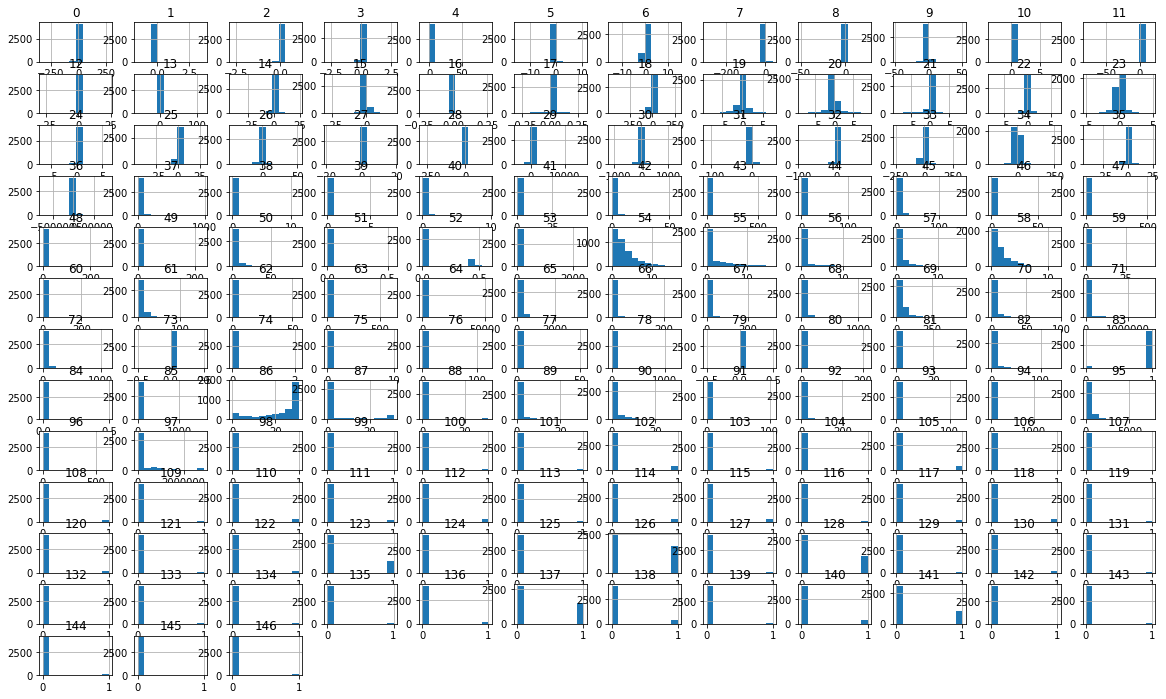

In [129]:
X_train = pd.DataFrame(X_train)

features = list(set(X_train.columns))
X_train[features].hist(figsize=(20,12));

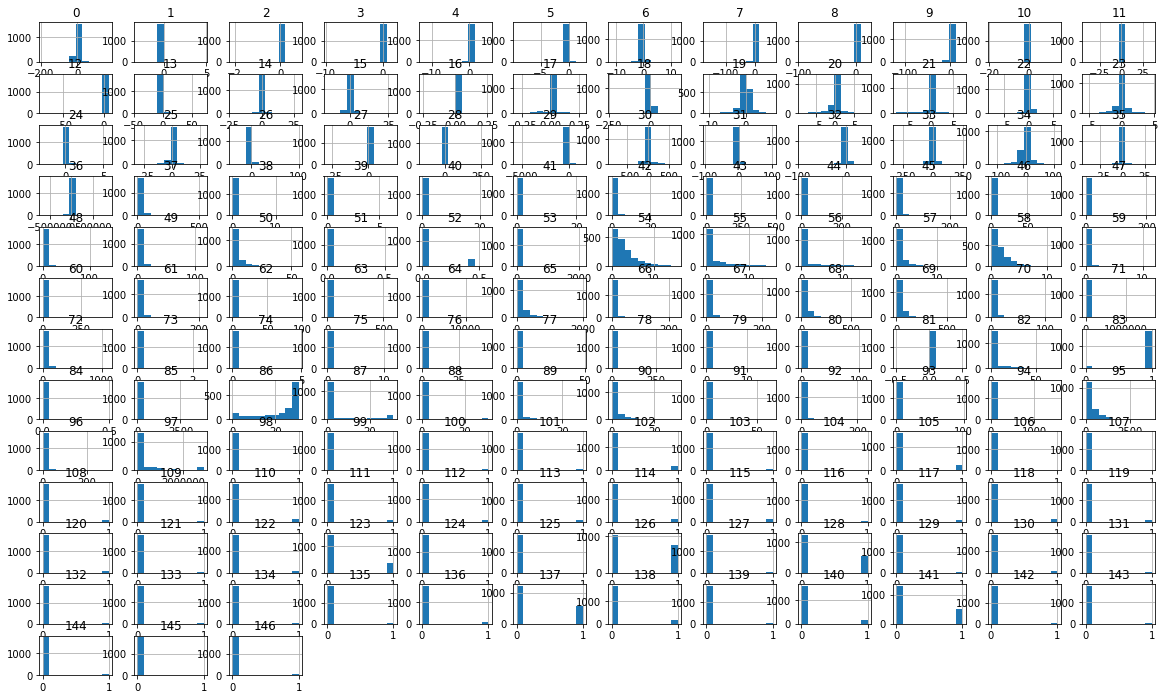

In [130]:
X_valid = pd.DataFrame(X_valid)

features = list(set(X_valid.columns))
X_valid[features].hist(figsize=(20,12));

In [131]:
#приводим распределение к нормальному

a = 0.001

for i in [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 
          65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
          81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
          100, 101, 102, 103, 104, 105, 106, 107, 108, 109]:
    if i in X_train.columns:
         X_train[i] = np.log(X_train[i] + a)

for i in [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 
          65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
          81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
          100, 101, 102, 103, 104, 105, 106, 107, 108, 109]:
    if i in X_valid.columns:
        X_valid[i] = np.log(X_valid[i] + a)

In [118]:
# Стандартизация приводим к единому масштабу
# выделяем количественные переменные в отдельный список
num_cols = [c for c in X_train.columns if X_train[c].dtype.name != 'object']
# создаем копию обучающего набора
X_train_copy = X_train.copy()
# выполняем стандартизацию
for i in num_cols:    
    X_train[i] = (X_train[i] - X_train[i].mean()) / X_train[i].std()
    X_valid[i] = (X_valid[i] - X_train_copy[i].mean()) / X_train_copy[i].std()

In [132]:
# Стандартизация приводим к единому масштабу еще способ +0,5% к точности
# выделяем количественные переменные в отдельный список
num_cols = [c for c in X_train.columns if X_train[c].dtype.name != 'object']
# создаем копию обучающего набора
X_train_copy = X_train.copy()
# выполняем стандартизацию
for i in num_cols:    
    X_train[i] = (X_train[i] - X_train[i].min()) / (X_train[i].max() - X_train[i].min())
    X_valid[i] = (X_valid[i] - X_train_copy[i].min()) / (X_train_copy[i].max() - X_train_copy[i].min())

In [133]:
columns = [73, 79]
X_train.drop(columns, axis=1, inplace=True)
X_valid.drop(columns, axis=1, inplace=True)

In [134]:
# обучим ЛогРег после нормализации и стандартизации
model.fit(X_train, y_train)
model.score(X_valid, y_valid)

0.448681996634885

In [135]:
# импортируем класс RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# создаем экземпляр класса RandomForestClassifier
forest=RandomForestClassifier(n_estimators=800, max_depth=17, 
                              random_state=152, n_jobs=-1, oob_score=True)
# строим модель
forest.fit(X_train, y_train)
# оцениваем дискриминирующую способность 
# модели случайного леса
print("Правильность на контрольной выборке: {:.2f}".format(model.score(X_valid, y_valid)))

Правильность на контрольной выборке: 0.45


In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [137]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   27.6s finished


({'knn__n_neighbors': 8}, 0.3961038961038961)

In [138]:
accuracy_score(y_valid, knn_grid.predict(X_valid))

0.41503084688726866

In [139]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

forest_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

forest_grid = GridSearchCV(forest, forest_params,
cv=5, n_jobs=-1,
verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_

0.4367399223359409
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.6min finished


({'max_depth': 8, 'max_features': 11}, 0.4478114478114478)

In [141]:
accuracy_score(y_valid, forest_grid.predict(X_valid))

0.45877734155916994

In [114]:
# Посылка еще в разработке
test_label = pd.read_csv(r"D:\Python\Task_BigDataSchool\BigDataSchool2\test.txt", sep="\t")

In [115]:
test_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 2 columns):
ID        3038 non-null int64
TARGET    0 non-null float64
dtypes: float64(1), int64(1)
memory usage: 47.5 KB


In [116]:
df_test = train.merge(test_label)

In [118]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 0 to 2889
Columns: 106 entries, ID to TARGET
dtypes: float64(99), int64(4), object(3)
memory usage: 2.4+ MB


In [138]:
cat_test_onehot = df_test.copy()
cat_test_onehot = pd.get_dummies(cat_test_onehot, columns=['T1', 'T2', 'T3'], prefix = ['T1', 'T2', 'T3'])
print(cat_test_onehot.head())

   ID    V1slope  V2slope  V3slope  V4slope  V5slope   V6slope   V7slope  \
0   7   0.792442      0.0      0.0      0.0      0.0  0.000000  0.000000   
1  11  -1.768039      0.0      0.0      0.0      0.0  0.110781  1.870508   
2  12  -5.342506      0.0      0.0      0.0      0.0 -0.323076  0.000000   
3  15  14.581462      0.0      0.0      0.0      0.0  0.164756 -0.077040   
4  16  -8.191542      0.0      0.0      0.0      0.0  0.000000 -0.091437   

    V8slope  V9slope  V10slope  V11slope  V13slope  V14slope  V15slope  \
0  0.000000      0.0  0.000000       0.0       0.0       0.0       0.0   
1  0.000000      0.0 -1.582306       0.0       0.0       0.0       0.0   
2 -0.073080      0.0  0.000000       0.0       0.0       0.0       0.0   
3  2.335621      0.0  2.135631       0.0       0.0       0.0       0.0   
4  0.031036      0.0 -0.721971       0.0       0.0       0.0       0.0   

   V16slope  V17slope  V18slope  V20slope  V21slope  V22slope  V23slope  \
0  0.138688 -0.067521  

In [139]:
test = cat_test_onehot.drop(['TARGET', 'V18slope', 'V18dev', 'V18med', 'ID'], axis=1, inplace=True)

In [140]:
submission = pd.DataFrame()
submission['ID'] = cat_test_onehot['ID']
submission['TARGET'] = forest_grid.predict(test)

KeyError: 'ID'

In [137]:
print(cat_test_onehot.head())

   ID    V1slope  V2slope  V3slope  V4slope  V5slope   V6slope   V7slope  \
0   7   0.792442      0.0      0.0      0.0      0.0  0.000000  0.000000   
1  11  -1.768039      0.0      0.0      0.0      0.0  0.110781  1.870508   
2  12  -5.342506      0.0      0.0      0.0      0.0 -0.323076  0.000000   
3  15  14.581462      0.0      0.0      0.0      0.0  0.164756 -0.077040   
4  16  -8.191542      0.0      0.0      0.0      0.0  0.000000 -0.091437   

    V8slope  V9slope  V10slope  V11slope  V13slope  V14slope  V15slope  \
0  0.000000      0.0  0.000000       0.0       0.0       0.0       0.0   
1  0.000000      0.0 -1.582306       0.0       0.0       0.0       0.0   
2 -0.073080      0.0  0.000000       0.0       0.0       0.0       0.0   
3  2.335621      0.0  2.135631       0.0       0.0       0.0       0.0   
4  0.031036      0.0 -0.721971       0.0       0.0       0.0       0.0   

   V16slope  V17slope  V20slope  V21slope  V22slope  V23slope  V24slope  \
0  0.138688 -0.067521  